# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
columns = list(data.columns.values)
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

mean_of_data = data.mean(axis=0).values
std_of_data = data.std(axis=0).values

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


# Explore the dataset

In [196]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d8db7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11da31990>]], dtype=object)

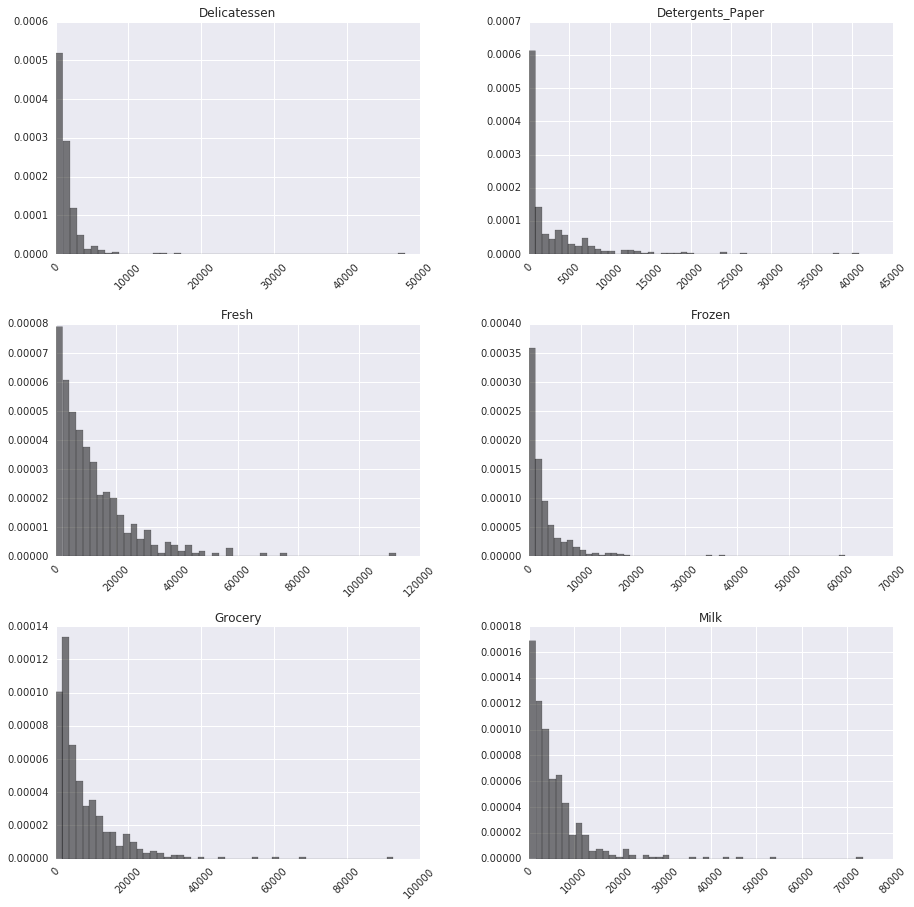

In [251]:
# plot histogram of all attributes
plt.figure(figsize=(15,15));
data.iloc[:,:].hist(color='k',alpha=0.5,bins=50,figsize=(15,15),xrot=45,normed=True)

We can see that the values of some attributes are almost uniformaly distributed like Fresh, Grocery, and Milk, while others are not where the attributes have a large number of small values and small number of large values like `Detergent_paper` and `Frozen`.

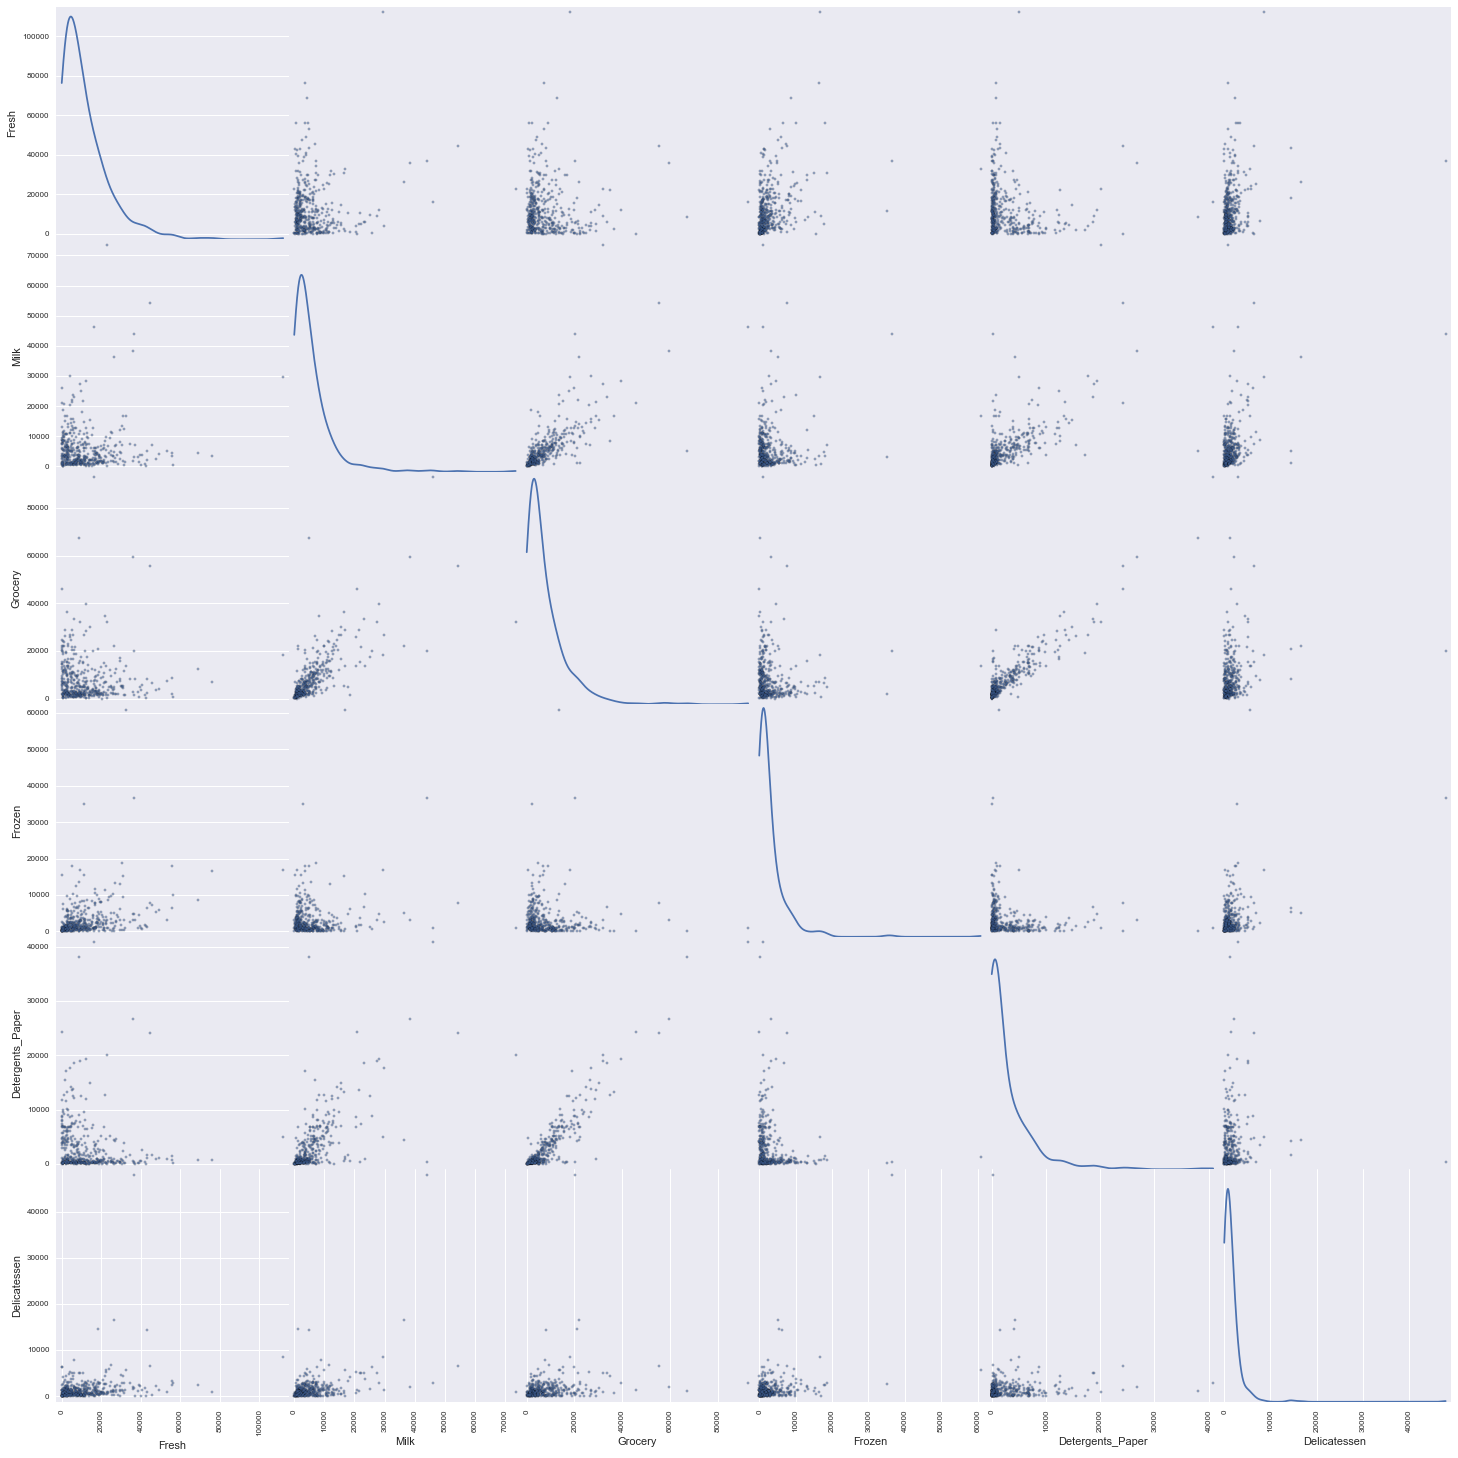

In [253]:
#plot scatter matrix between all attributes
from pandas.tools.plotting import scatter_matrix
sm = scatter_matrix(data[columns], figsize=(25,25), diagonal='kde') # kernel density estimates

In [254]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


We noticed that the highest correlation is between the Grocery and Detergents_paper then the Grocery and Milk.

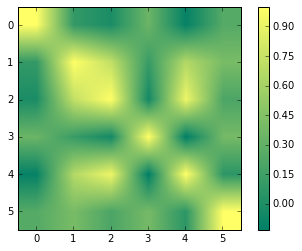

In [2]:
# compute correlation between attributes
plt.imshow(data.corr(), cmap='summer')
plt.colorbar()

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 

PCA/ICA can be used to reduce the dimensions of a data set. Dimension reduction is analogous to being philosophically reductionist: It reduces the data down into it’s basic components, stripping away any unnecessary parts.  Reducing dimensions helps to simplify the data and makes it easier to visualise.

More generally, Principal Component Analysis does just what it advertises; it finds the principal components of the dataset. PCA transforms the data into a new, lower-dimensional subspace—into a new coordinate system—. In the new coordinate system, the first axis corresponds to the first principal component, which is the component that explains the greatest amount of the variance in the data.

In general, the data will tend to follow the 80/20 rule. Most of the variance (interesting part of data) will be explained by a very small number of principal components. We might be able to explain 95% of the variance in our dataset using only 10% of the original number of attributes. However, this is entirely dependent on the dataset. Often, a good rule of thumb is to identify the principal components that explain 99% of the variance in the data.

On the other hand, ICA find a basis along which the data (when projected) is statistically independent.

Therefore, 

    PCA will show us a subspace of the most interesting data (where there is most of the variance). 
    ICA will show us a subspace of independent factors that contribute to customer needs.

### PCA

##### Aside : Applying scaling to our data prior to feeding it to PCA
With PCA, the obtained principal components point in the directions of maximum variance.  We're more-or-less looking at covariation between features, rather than correlation.  If the features are on different magnitudes of range, it can cause the results of PCA to be biased in the direction of the features with large range. For example, imagine a situation with two features where the range of one feature is one hundred times larger than the other (e.g. [-1, 1] vs. [-100, 100]). The first principal component will likely point strongly in the direction of the component with the large range; the PCA will not give us much help in this case. Scaling our features before applying PCA is a good idea, as it puts all features on an even field in identifying correlations and relationships between them.

In this project, however, it is worth noting that all of the dimensions of the wholesale grocery data are in the same units and therefore does not require any scaling.

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset

# Note: When performing PCA, it is typically a good idea to normalize the data first. 
# Because PCA seeks to identify the principal components with the highest variance, 
# if the data are not properly normalized, attributes with large values and large variances 
# (in absolute terms) will end up dominating the first principal component when they should not.

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1]) # we are shifting the dimensionality to another scale
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_ # rotation matrix
print pca.explained_variance_ratio_ # scaling of the axis 

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

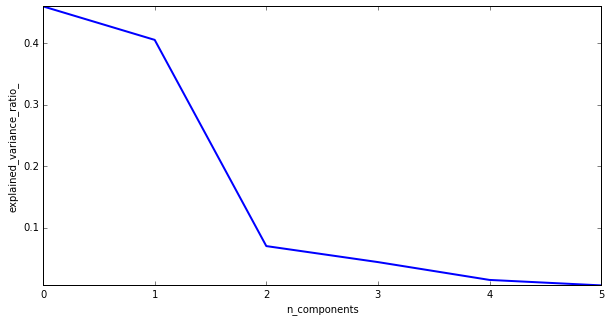

In [4]:
# Plot of the PCA spectrum
plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Answer: 

After the first dimension we see that the explained variance ratio drop considerly.
    One could argue that there is some sort of an "elbow" around 2 components, and that after around 4 components the spectrum becomes very monotonic. So 2 components seems like a reasonable number on the basis of eigenvalues only.
    
The PCA projects the data into a space where the variance is maximized.

In [5]:
print pca.explained_variance_ratio_

[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


We know that the first PC accounts for 45% of the information of the original dataset while the second one accounts for 40%.

In [6]:
for i in range(1,5):
    pca = PCA(n_components=i)
    pca.fit(data)
    print sum(pca.explained_variance_ratio_) * 100,'%'

45.9613616814 %
86.4785884939 %
93.4815965411 %
97.8839408947 %


The more PCs we use the more the information is preserved, but this analysis helps us to understand how many components we can use to save a certain amount of information.  We can visualize this by looking at the variance, this plot help us understand the level of redundancy present in multiple observations.

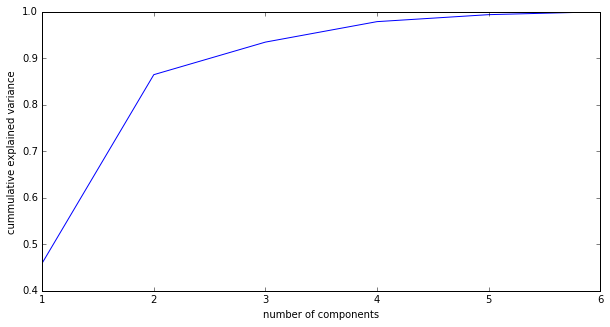

In [7]:
pca = PCA(n_components=data.shape[1]).fit(data)
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,7), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel('cummulative explained variance')

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

The dimension reresent the directions where there is the most variance, the directions where the data is most spread out. We can use this information to reduce the dimensions of our dataset.  PCA can help us simplify this data set by finding the dominant dimensions within it.
    By using 2 PCs we maintain 86.48% of the information (variance) from our dataset.
   

In [8]:
pca = PCA(n_components=2)
pca.fit(data)
data_trans = pca.transform(data)
print(data.shape)
print(data_trans.shape)

(440, 6)
(440, 2)


By specifying that we throw away 4 components (13.52% of the variance), the data is now compressed by a factor of 60% !

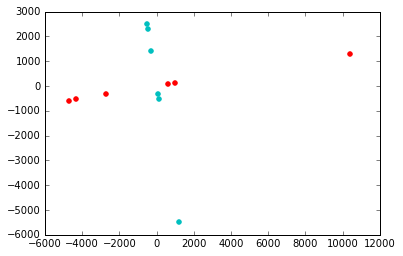

In [9]:
first_pc = pca.components_[0]
second_pc = pca.components_[1]
for ii, jj in zip(data_trans, data):
    plt.scatter(first_pc[0]*ii[0], first_pc[1]*ii[0], color='r')
    plt.scatter(second_pc[0]*ii[0], second_pc[1]*ii[0], color='c')    

By plotting the two first PC, we clearly see the direction of the vectors.  We can notice that these two vectors are showing orthogonality. 

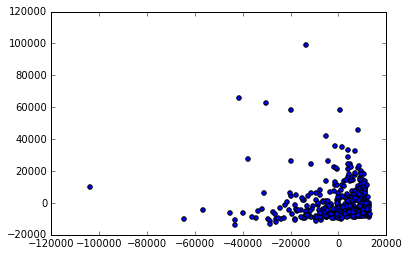

In [10]:
plt.scatter(data_trans[:, 0], data_trans[:, 1])

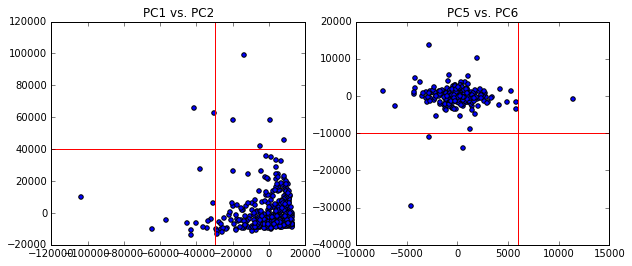

In [11]:
pca = PCA()
pca.fit(data)
data_trans = pca.transform(data)

f, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

axarr[0].scatter(data_trans[:, 0], data_trans[:, 1])
axarr[0].axvline(x=-30000, color='r')
axarr[0].axhline(y=40000, color='r')
axarr[0].set_title("PC1 vs. PC2")

axarr[1].scatter(data_trans[:, -1], data_trans[:, -2])
axarr[1].axvline(x=6000, color='r')
axarr[1].axhline(y=-10000, color='r')
axarr[1].set_title("PC5 vs. PC6")

plt.show()

Principal Component Analysis can completly restructure the data, removing redundancies and ordering newly components according to the amount of the original variance that they express.  The first two components, being the most informative in term of variance, can depict the general distribution of the data.  The output provides a good hint at possible evident outliers.
By looking at the above plot, we can see a possible threshold to use for separating regular data from suspect data.

Using the two first components, we can locate a few points to investigate using the threshold of -30000 for the first component and of 40000 for the second. All cases below these values are possible outliers.

In [12]:
outlying = (data_trans[:,0] < -30000) | (data_trans[:,1] > 40000)
# we inverse transform our outliers to the initial scalled data
outlying_transform = pca.inverse_transform(data_trans[outlying])
print pd.DataFrame(outlying_transform, columns = columns)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    56159    555      902   10002               212          2916
1    44466  54259    55571    7782             24171          6465
2    35942  38369    59598    3254             26701          2017
3       85  20959    45828      36             24231          1423
4    16117  46197    92780    1026             40827          2944
5    22925  73498    32114     987             20070           903
6    43265   5025     8117    6312              1579         14351
7    56082   3504     8906   18028              1480          2498
8    76237   3473     7102   16538               778           918
9    45640   6958     6536    7368              1532           230
10  112151  29627    18148   16745              4948          8550
11   36847  43950    20170   36534               239         47943
12   12119  28326    39694    4736             19410          2870
13   47493   2567     3779    5243               828          

/Users/mic0331/anaconda/envs/udacity_env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


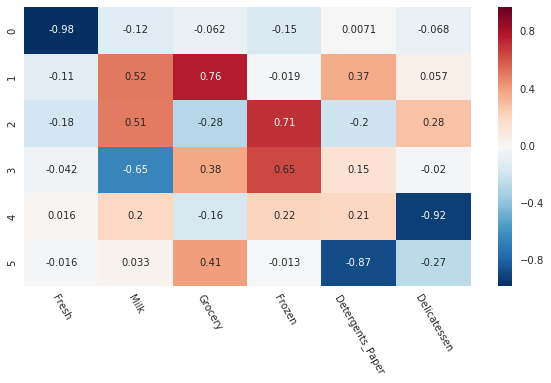

In [13]:
import seaborn as sns
data_trans = pd.DataFrame(pca.components_, columns=columns)

plt.figure(figsize=(10,5))
plt.xticks(rotation=300)
sns.heatmap(data_trans, annot=True)

PCA can be used for two cases, one is to look at correlations between data and the second to perform feature reduction by making composite features.  

In the intial phase of this project we identified that `Grocery` and `Detergents_paper` then the `Grocery` and `Milk` where somewhere corolated.  With PCA apply on the dataset, we can expect that there would be less variations between the correlated features compare to other features.

PCA will draw new features that minimize variance (information loss) so that new composite features are obtained based on original features. Therefore, we can represent the new composite feature as a combination of at least the collerated features.

The first component appears to contain most of `Fresh` and a litle of `Milk`.  the second PC contain `Grocery, Milk and Detergents_Paper`.

### ICA

In [14]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

scaled_data = data.copy()
scaled_data -= scaled_data.mean()

ica = FastICA(n_components=data.shape[1], random_state=234)
ica.fit(scaled_data)
data_trans = ica.transform(scaled_data)
# Print the independent components
print ica.components_

[[ -2.98461639e-07   2.32440922e-06   1.20262617e-05  -1.46479715e-06
   -2.81985398e-05  -5.73194595e-06]
 [  8.65065985e-07   1.40703158e-07  -7.74137311e-07  -1.11462981e-05
    5.53973068e-07   5.95394921e-06]
 [ -3.86563061e-07  -2.19496700e-07  -6.00206043e-07  -5.20904117e-07
    5.10237284e-07   1.80917058e-05]
 [ -2.09554905e-07   1.88144884e-06  -6.47998231e-06  -4.04471782e-07
    9.27036648e-07   1.47629524e-06]
 [ -3.97605707e-06   8.60785304e-07   6.31482088e-07   6.76828367e-07
   -2.07714839e-06   1.03920371e-06]
 [  1.54286576e-07   9.84196970e-06  -5.81836704e-06  -3.62178667e-07
    3.34313001e-06  -6.05311475e-06]]


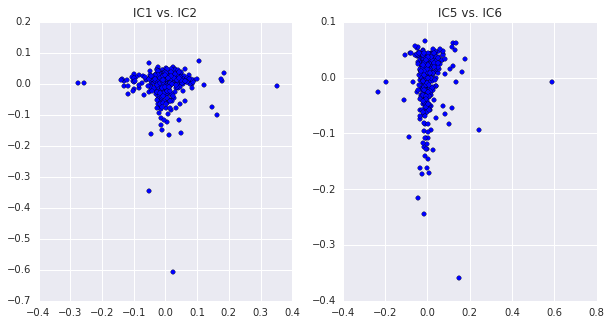

In [15]:
f, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axarr[0].scatter(data_trans[:, 0], data_trans[:, 1])

axarr[0].set_title("IC1 vs. IC2")

axarr[1].scatter(data_trans[:, -1], data_trans[:, -2])
axarr[1].set_title("IC5 vs. IC6")

plt.show()

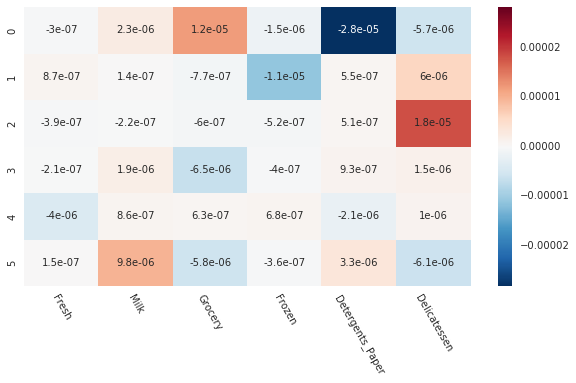

In [16]:
import seaborn as sns
data_trans = pd.DataFrame(ica.components_, columns=columns)

plt.figure(figsize=(10,5))
plt.xticks(rotation=300)
sns.heatmap(data_trans, annot=True)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

The goal of ICA is to find a basis along wich the data (when projected) is statistically independant - Statistical independence means that the sources do not contain any information on each other. 
More specifically, the idea of applying ICA to the wholesale groceries dataset is to ask if there are independent factors that contribute to customer needs.

For example, if some restaurants have a bar attached, or some grocery stores have a deli counter or butcher's attached, we might expect that there are specific purchasing patterns that correspond to those, which are independent of each other.

From the last heatmap, we can see the degree of independence among dimensions. 

Looking at the previous plot, we can see that IC1 is maintain composed of `Grocery`, `Detergents_Paper` and `Milk`.  IC2 incorporate `Frozen`, `Delicatness` and `Fresh`...

These components can be used to trim down the feature set into new ones that are statistically independant from one another.  However, by looking at the magnitude of the components we cannot clearly see if there are independent factors that contribute to customer needs.  Therefore, we can say that ICA is inappropriate or uninformative for this project.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

**Aside** : 

K-means define hard clusters, the samples are to be associated to the groups.  It is simple to put in place. All is needed, is to choose "k" and run the lgorithm a number of times.  The difficulties is arround finding, a priory, the best k, number of cluster.

A GMM assumes that the observed data is made up of a mixture of several Gaussian distributions. These individual distributions (referred to as mixture components) may be given different means and variances. They may also be given different mixture weights. The final distribution is obtained by multiplying each mixture component by its associated mixture weight before and adding them together (mixture weights must sum to one).

The main difference between `GMM` and `k-means` is the type of assignment of the data points to the cluster, in k-means, at a given point in the algorithm, we are certain that a point belongs to a cluster. In the next iteration, we might revise that belief, and be **certain** that it belongs to the same of another cluster.

If we think, well, I can't be sure, but there is 70% chance it belongs to the a cluster, but also 10% chance its in another cluster, 20% chance it might be in another cluster. That's a **soft assignment**. The Mixture of Gaussian model helps us to express this uncertainty. 

As our data does not present a clear devide in the data we choose to use GMM.  This model will eventually help us place customer into their respective customer segment.

Answer :
    
**k-means** : If we have a large number of data points, k-means may be faster (if k is small)

**GMM** : It is a fast algorithm if we have mixture model.  GMM is a good algorithm for the classification of static postures and non-temporal pattern recognition.  One limitation is that it can fail to work if the dimensionality of the problem is too high.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [17]:
# Import clustering modules
from sklearn.mixture import GMM
from sklearn.cluster import KMeans

In [18]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
print reduced_data[:10]  # print up to 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [19]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
clusters = GMM(n_components=2)
#clusters = GMM(n_components=3)
#clusters = GMM(n_components=4)
#clusters = GMM(n_components=5)
#clusters = GMM(n_components=6)
#clusters = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=300, random_state=10)
#clusters = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300, random_state=10)
#clusters = KMeans(init='k-means++', n_clusters=4, n_init=10, max_iter=300, random_state=10)
#clusters = KMeans(init='k-means++', n_clusters=6, n_init=10, max_iter=300, random_state=10)

clusters.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [20]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [21]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = clusters.means_ # for GMM
#centroids = clusters.cluster_centers_ # for k-means
print centroids

[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]]


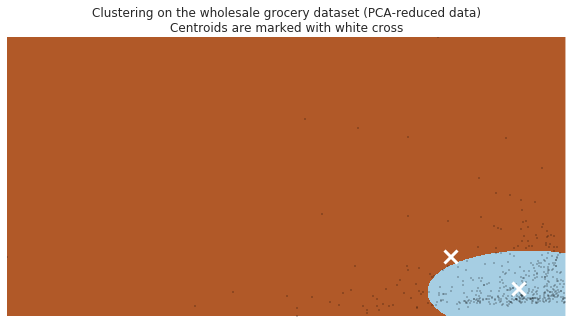

In [22]:
# Put the result into a color plot
plt.figure(figsize=(10,5))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

Applying PCA first is not [lossless](http://arxiv.org/pdf/1204.0429.pdf).  Thus the dimensions that are dropped out by PCA cannot be "reconstructed" afterwards.  What we are achieving here is essentially applying PCA and then k-means on a smaller set of dimensions.  There is no point to "compare" these centroids with the original ones because we cannot compare things that have different number of dimensions.  Let's however get an approximation of the centers in the original spare using PCA's inverse transform.

In [23]:
# inverse the data 
inverse_centers = pca.inverse_transform(clusters.means_)
# "de-scale" the data
centers_data = (inverse_centers * std_of_data) + mean_of_data
print pd.DataFrame(centers_data, columns = columns)   

          Fresh             Milk       Grocery           Frozen  \
0  1.151438e+08  28340225.092265  5.171320e+07  12743379.343737   
1  2.715051e+08  89981091.750191  1.535235e+08  22016343.904010   

   Detergents_Paper    Delicatessen  
0    8597232.614274  3180755.301522  
1   30550145.934271  7964922.509768  


To see how the distributions are affected for each cluster, the sales of each category is accumulated then plotted in stacked bars.

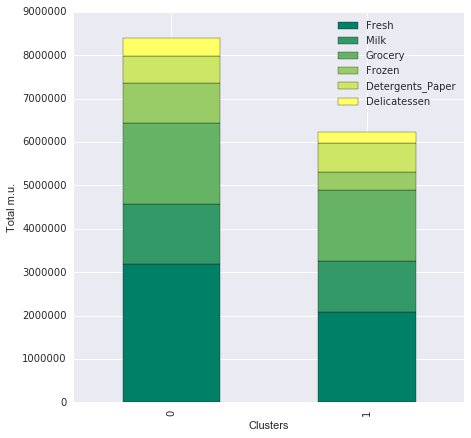

In [25]:
nbr_col = 5
data_GMM = clusters.predict(reduced_data)

totals = np.array([]).reshape(0, nbr_col+1)
for i in range (nbr_col):
    idx = data_GMM == i
    cl = np.array(data[idx])
    prod_tot = cl.sum(axis=0)
    totals = np.vstack((totals, prod_tot))

df = pd.DataFrame(totals, columns=columns)[:2] 
plt.figure()

rect = df.plot(kind='bar', stacked=True, colormap='summer', figsize=(7,7))
plt.xlabel('Clusters')
plt.ylabel('Total m.u.')

plt.show()

This last plot is showing interesting information about the customer classification, for example we can notice that customers of cluster 1 (cluster are zero based indexed) are consuming more on `Fresh` that customer of cluster 2.
Customer of cluster 1 are also consuming more `Detergents_Paper` than customer of cluster 2.

So far this model help us identifying two types of customers based on volume of sales.  The customers on the "small volume" are grouped together on the bottom right. The high vilume customer have high vriations, they are occupying the rest of the space.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

K-means/GMM algorithm is simple and elegant unsupervised learning algorithm, which could be helpful in many applications where dissimilarity distance measure could be well defined on its data. However, determining the optimum number of clusters is not an easy task.
Even if our dataset is very small (440 data points on 6 features), by using GMM on top of PCA, we manage to segregate the customer and display a bar chart showing characteristics per clusters.

Having some attributes, with certain properties like classification labels, in the data could help in justifying the resulted groupings.  However we don't have this luxuery in this dataset.

Using PCA to reduce the dimensions of a multidimensional data, for plotting it, is useful to visualize the clusters. Alternatively, statistical properties of the attributes, like correlation, could also be used to select some attributes, to be plotted, as a representative of the data points.

Another usefullness of PCA is the isolation of outliers for which we can make advanced investigation. 

ICA on the other hand does not give much iintuition in this dataset.  The technique does not reveal any hidden factors that underlie the data.

Some other things need to be investigated, like what attributes affect the selection of cluster centers the most, and how to identify them. Also what kind of pre-processing we could apply to the data in order to improve the quality of the clustering, like for example normalizing the attribute values. Searching for alternative dissimilarity measures
could help in adapting the algorithm to different data types.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

Based on the clustering performed on the dataset, maybe the company can run A/B tests in order to understand the impact of changing the delivery methods on both high / low volume customer.  It is very likely that the company will observe litle or no change for customer with high volume. However, for small volume customer, they may notice some customer churn or dissatisfaction in this customer group.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

The clustering technique and correlations discovered in the dataset can be useful to predict future customer needs.
For example, with the correlation study, we discovered that `Grocery` and `Detergents_paper` are very likely to be purchased together.  

With the clustering, we discovered different familly of customer with related pattern - With that, market researchers can create market segments or experiment product positioning, they can launch new product development or select some test markets.

As a side note, it is important to mention that clustering can be improoved if additional information are collected, for example the type of store, the location of the store, the type of store ...

This project so far is trying to predict customer needs, we can use what has been discovered so far in order to set up a supervised learning project.  For example the company can model the customer habits in each group so they can better forcast stocks and inventory.  They can also predict what makes a customer ceases his relationship with the company. 